In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
import hvplot.pandas
from pathlib import Path
import pathlib
from pandas_datareader import DataReader
import pandas_datareader.data as web
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import quandl
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from tensorflow.keras.models import model_from_json


warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Setting dates
start = datetime.datetime(2016, 12, 1)
end = datetime.datetime.now()

In [3]:
# importing TSLA / BABA / AMD / SQ
amd_df = DataReader('AMD', 'yahoo', start, end)
amd_close = amd_df[['Close', 'Volume']]
amd_close.columns = ['AMD_Close', 'AMD_Volume']
amd_close.head(5)

AMD_Close  AMD_Volume
Date                             
2016-12-01       8.39    56682400
2016-12-02       8.53    42398900
2016-12-05       8.68    31410100
2016-12-06       9.45    92242900
2016-12-07       9.56    54897300

In [4]:
mu_df = DataReader('MU', 'yahoo', start, end)
mu_close = mu_df[['Close', 'Volume']]
mu_close.columns = ['MU_Close', 'MU_Volume']
mu_close.head(5)

MU_Close  MU_Volume
Date                            
2016-12-01  18.480000   40713100
2016-12-02  18.790001   25887600
2016-12-05  18.610001   26635500
2016-12-06  19.059999   22267800
2016-12-07  20.440001   44735700

In [5]:
nvda_df = DataReader('NVDA', 'yahoo', start, end)
nvda_close = nvda_df[['Close', 'Volume']]
nvda_close.columns = ['NVDA_Close', 'NVDA_Volume']
nvda_close.head(5)

NVDA_Close  NVDA_Volume
Date                               
2016-12-01   87.639999   25888100.0
2016-12-02   88.449997   11957300.0
2016-12-05   91.879997   15057100.0
2016-12-06   93.389999   12469900.0
2016-12-07   95.070000   12020100.0

In [6]:
intc_df = DataReader('INTC', 'yahoo', start, end)
intc_close = intc_df[['Close', 'Volume']]
intc_close.columns = ['INTC_Close', 'INTC_Volume']
intc_close.head(5)

INTC_Close  INTC_Volume
Date                               
2016-12-01   33.759998   29618700.0
2016-12-02   34.160000   21492500.0
2016-12-05   34.389999   14462000.0
2016-12-06   34.720001   15297700.0
2016-12-07   35.500000   21710300.0

# Features

In [108]:
# ADI (Analog Devices / Semiconductor-Integrated circuits)
adi_df = DataReader('ADI', 'yahoo', start, end)
adi_close = adi_df[['Close', 'Volume']]
adi_close.columns = ['ADI_Close', 'ADI_Volume']

# XLNX (Xilixn.Inc / Supplier of programmable logic devices)
# The is primarily a supplier of programmable logic devices. The company invented the field-programmable gate array and 
# is the semiconductor company that created the first fabless manufacturing model.
xlnx_df = DataReader('XLNX', 'yahoo', start, end)
xlnx_close = xlnx_df[['Close', 'Volume']]
xlnx_close.columns = ['XLNX_Close', 'XLNX_Volume']

# USD (ProShares Ultra Semiconductors ETF)
mchi_df = DataReader('USD', 'yahoo', start, end)
mchi_close = mchi_df[['Close', 'Volume']]
mchi_close.columns = ['MCHI_Close', 'MCHI_Volume']

# AMAT (Applied Materials / Silicon Supplier)
# Provides manufacturing equipment, services, and software to the semiconductor, display, and related industries.
amat_df = DataReader('AMAT', 'yahoo', start, end)
amat_close = amat_df[['Close', 'Volume']]
amat_close.columns = ['AMAT_Close', 'AMAT_Volume']

# ASML (ASML Holdings / Silicon Supplier / engages in the manufacture, and trade of lithography system for the semiconductor industry)
# The company develops machines that are used for the production of integrated circuits and chips
asml_df = DataReader('ASML', 'yahoo', start, end)
asml_close = asml_df[['Close', 'Volume']]
asml_close.columns = ['ASML_Close', 'ASML_Volume']

# LRCX (Lam Research)
# The company designs, manufactures, markets, refurbishes, and servies semiconductor processing equipment used in the fabrication of integrated circuits)
lrcx_df = DataReader('LRCX', 'yahoo', start, end)
lrcx_close = lrcx_df[['Close', 'Volume']]
lrcx_close.columns = ['LRCX_Close', 'LRCX_Volume']

# SLAB (Silicon Labs)
# The company designs, develops, and markets mixed-signal integrated circuits in the US, China and internationally. 
#The company offers Internet of things products, including 8-bit mixed-signal, 32-bit wireless, ultra-low-power 32-bit microcontrollers
slab_df = DataReader('SLAB', 'yahoo', start, end)
slab_close = slab_df[['Close', 'Volume']]
slab_close.columns = ['SLAB_Close', 'SLAB_Volume']

# KLAC (KLA Corporation)
# It supplies process control and yield management systems for the semiconductor industry and other related nanoelectronics industries
# The company offers chip and wafer manufacturing products, including defect inspection and review systems, metrology solutions, in situ process monitoring products, 
# computational lithography software, and data analytics systems for chip manufacturers to manage yield throughout the semiconductor fabrication process.
klac_df = DataReader('KLAC', 'yahoo', start, end)
klac_close = klac_df[['Close', 'Volume']]
klac_close.columns = ['KLAC_Close', 'KLAC_Volume']

In [109]:
# Concatenating each stock
stocks_df = pd.concat([amd_close, mu_close, nvda_close, intc_close, adi_close, xlnx_close, mchi_close, amat_close, asml_close, lrcx_close, slab_close, klac_close], axis=1, join='outer')
stocks_df.head()

AMD_Close  AMD_Volume   MU_Close  MU_Volume  NVDA_Close  \
Date                                                                  
2016-12-01       8.39    56682400  18.480000   40713100   87.639999   
2016-12-02       8.53    42398900  18.790001   25887600   88.449997   
2016-12-05       8.68    31410100  18.610001   26635500   91.879997   
2016-12-06       9.45    92242900  19.059999   22267800   93.389999   
2016-12-07       9.56    54897300  20.440001   44735700   95.070000   

            NVDA_Volume  INTC_Close  INTC_Volume  ADI_Close  ADI_Volume  ...  \
Date                                                                     ...   
2016-12-01   25888100.0   33.759998   29618700.0  69.010002   5518200.0  ...   
2016-12-02   11957300.0   34.160000   21492500.0  70.110001   3248100.0  ...   
2016-12-05   15057100.0   34.389999   14462000.0  70.599998   2445000.0  ...   
2016-12-06   12469900.0   34.720001   15297700.0  71.000000   2196800.0  ...   
2016-12-07   12020100.0   35.500000   21710300.0  72.940002   2648400.0  ...   

            AMAT_Close  AMAT_Volume  ASML_Close  ASML_Volume  LRCX_Close  \
Date                                                                       
2016-12-01   30.100000   25173900.0   99.989998     837900.0   98.580002   
2016-12-02   31.440001   15229600.0   99.779999     701100.0  100.489998   
2016-12-05   31.530001   13035900.0  102.919998     818600.0  102.400002   
2016-12-06   31.610001   10088000.0  102.709999     399900.0  103.050003   
2016-12-07   32.509998   12589000.0  103.550003     566600.0  106.550003   

            LRCX_Volume  SLAB_Close  SLAB_Volume  KLAC_Close  KLAC_Volume  
Date                                                                       
2016-12-01    6759500.0   62.250000       445400   75.930000    3435400.0  
2016-12-02    2844200.0   63.599998       207100   76.260002    2718400.0  
2016-12-05    2987300.0   64.900002       168900   77.029999    1402400.0  
2016-12-06    2420400.0   66.250000       180900   78.120003    1277000.0  
2016-12-07    2780000.0   67.050003       200300   79.260002    1765300.0  

[5 rows x 24 columns]

# Correlation 

In [110]:
import seaborn as sns
daily_returns = stocks_df.pct_change()
daily_returns = daily_returns.dropna()
daily_returns.columns

Index(['AMD_Close', 'AMD_Volume', 'MU_Close', 'MU_Volume', 'NVDA_Close',
       'NVDA_Volume', 'INTC_Close', 'INTC_Volume', 'ADI_Close', 'ADI_Volume',
       'XLNX_Close', 'XLNX_Volume', 'MCHI_Close', 'MCHI_Volume', 'AMAT_Close',
       'AMAT_Volume', 'ASML_Close', 'ASML_Volume', 'LRCX_Close', 'LRCX_Volume',
       'SLAB_Close', 'SLAB_Volume', 'KLAC_Close', 'KLAC_Volume'],
      dtype='object')

NVDA_Close     1.000000
MCHI_Close     0.773190
AMAT_Close     0.579829
MU_Close       0.565843
ASML_Close     0.563273
AMD_Close      0.556220
ADI_Close      0.554370
KLAC_Close     0.541019
LRCX_Close     0.535391
SLAB_Close     0.519069
XLNX_Close     0.505719
INTC_Close     0.497504
AMAT_Volume    0.115096
KLAC_Volume    0.056386
NVDA_Volume    0.052547
ADI_Volume     0.041923
INTC_Volume    0.036362
AMD_Volume     0.034746
MU_Volume      0.026321
MCHI_Volume    0.024813
ASML_Volume    0.018468
LRCX_Volume    0.011269
XLNX_Volume    0.001673
SLAB_Volume    0.000586
Name: NVDA_Close, dtype: float64

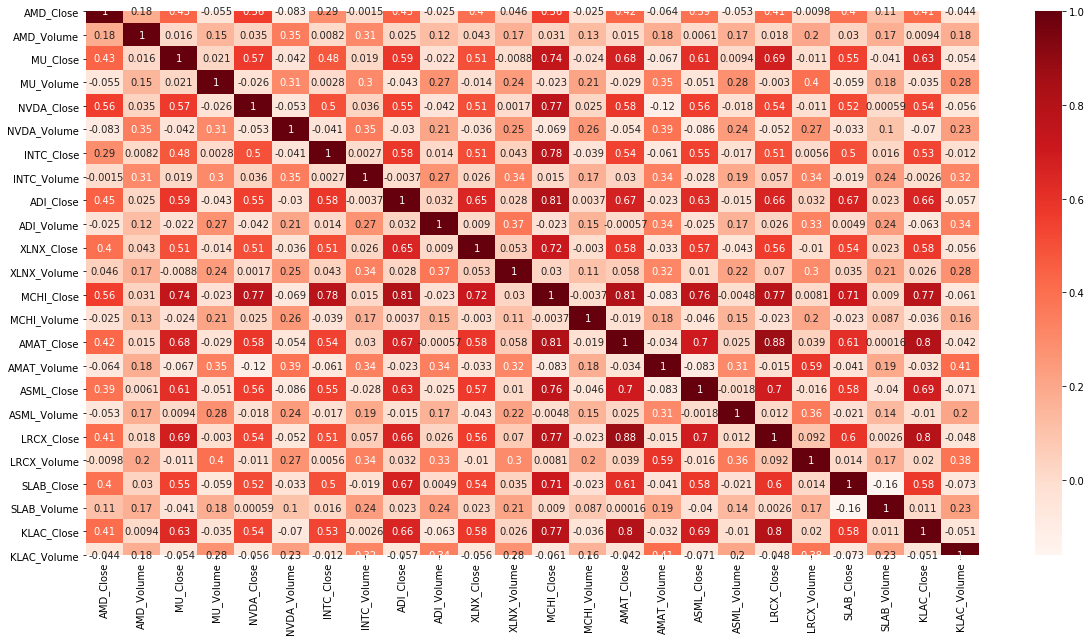

In [111]:
correlation = daily_returns.corr()

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
cor_target = abs(correlation['NVDA_Close'])

#Selecting highly correlated features
re_features = cor_target[cor_target>0.0]
re_features.sort_values(ascending=False)

# Volatility

In [112]:
#Augmented Dickey-Fuller test to determine if the stocks are stationary
from statsmodels.tsa.stattools import adfuller
adfuller(stocks_df.NVDA_Close)

(-1.853178675328768,
 0.3543974809180016,
 0,
 767,
 {'1%': -3.4389045244994096,
  '5%': -2.8653156040031176,
  '10%': -2.5687805115003},
 4530.684964772603)

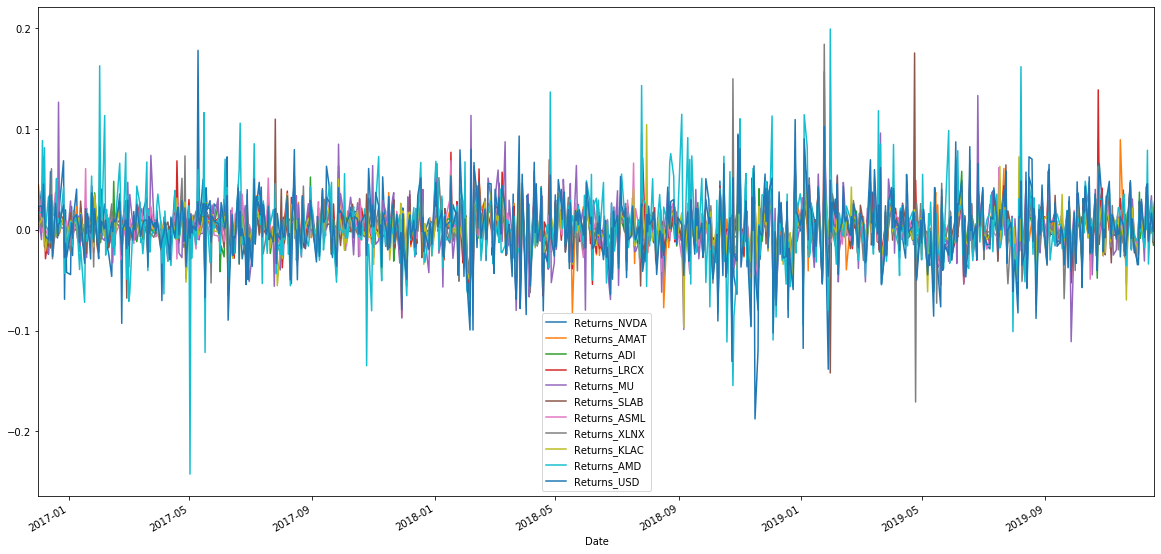

In [113]:
# Making stationary
df = stocks_df.copy()
df['Returns_NVDA'] = df.NVDA_Close.pct_change()
df['Returns_AMAT'] = df.AMAT_Close.pct_change()
df['Returns_ADI'] = df.ADI_Close.pct_change()
df['Returns_LRCX'] = df.LRCX_Close.pct_change()
df['Returns_MU'] = df['MU_Close'].pct_change() 
df['Returns_SLAB'] = df['SLAB_Close'].pct_change() 
df['Returns_ASML'] = df['ASML_Close'].pct_change() 
df['Returns_XLNX'] = df['XLNX_Close'].pct_change()
df['Returns_KLAC'] = df['KLAC_Close'].pct_change() 
df['Returns_AMD'] = df['AMD_Close'].pct_change() 
df['Returns_USD'] = df['MCHI_Close'].pct_change() 



df = df.dropna()

# Organize
returns_nvda = df.loc[:, 'Returns_NVDA']
returns_amat = df.loc[:, 'Returns_AMAT']
returns_adi = df.loc[:, 'Returns_ADI']
returns_lrcx = df.loc[:, 'Returns_LRCX']
returns_mu = df.loc[:, 'Returns_MU']
returns_slab = df.loc[:, 'Returns_SLAB']
returns_asml = df.loc[:, 'Returns_ASML']
returns_xlnx = df.loc[:, 'Returns_XLNX']
returns_klac = df.loc[:, 'Returns_KLAC']
returns_amd = df.loc[:, 'Returns_AMD']
returns_usd = df.loc[:, 'Returns_USD']





# Plot the returns
returns_nvda.plot(legend=True, figsize=(20,10))
returns_amat.plot(legend=True)
returns_adi.plot(legend=True)
returns_lrcx.plot(legend=True)
returns_mu.plot(legend=True)
returns_slab.plot(legend=True)
returns_asml.plot(legend=True)
returns_xlnx.plot(legend=True)
returns_klac.plot(legend=True)
returns_amd.plot(legend=True)
returns_usd.plot(legend=True)

In [114]:
# GARCH
import arch as arch
from arch import arch_model

In [115]:
# Summary
model_nvda = arch_model(returns_nvda, mean='Zero', vol='GARCH', p=2, q=2)
final_nvda = model_nvda.fit(disp='off')
final_nvda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:           Returns_NVDA   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                1692.39
Distribution:                  Normal   AIC:                          -3374.77
Method:            Maximum Likelihood   BIC:                          -3351.56
                                        No. Observations:                  767
Date:                Thu, Dec 19 2019   Df Residuals:                      762
Time:                        18:31:25   Df Model:                            5
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.4316e-04  2.014e-04      1.208      0.227 [-1.515e-04,6.378e-04]
alpha[1]       0.0807  4.270e-02      1.890  5.872e-02   [-2.975e-03,  0.164]
alpha[2]       0.1631      0.238      0.685      0.494      [ -0.304,  0.630]
beta[1]    1.0290e-07      0.953  1.079e-07      1.000      [ -1.869,  1.869]
beta[2]        0.4494      0.547      0.821      0.412      [ -0.623,  1.522]
=============================================================================

Covariance estimator: robust
"""

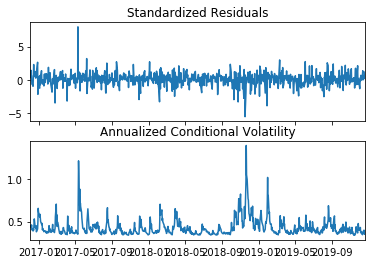

In [116]:
figure_nvda = final_nvda.plot(annualize='D')

In [117]:
# Forecasting from GARCH
last_day = df.index.max().strftime('%Y-%m-%d')
print(last_day)

forecast_horizon = 10
forecasts_nvda = final_nvda.forecast(start=last_day, horizon=forecast_horizon)

# Annualize the forecast
intermediate = np.sqrt(forecasts_nvda.variance.dropna() * 252)
intermediate.head()

2019-12-19


h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2019-12-19  0.371771  0.396356  0.398261  0.412675  0.414935  0.423652   

                h.07      h.08      h.09      h.10  
Date                                                
2019-12-19  0.425696  0.431085  0.432747  0.436136

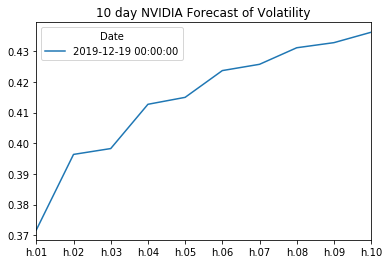

In [118]:
# Plot the forecast
final_nvda_plot = intermediate.dropna().T
final_nvda_plot.plot(title = '10 day NVIDIA Forecast of Volatility')

# Time Series Linear Regression

In [119]:
# Price Prediction 
df_1 = stocks_df.copy()
df_1['Return_nvda'] = df_1['NVDA_Close'].pct_change() * 100
df_1['Return_amat'] = df_1['AMAT_Close'].pct_change() * 100
df_1['Return_adi'] = df_1['ADI_Close'].pct_change() * 100
df_1['Return_lrcx'] = df_1['LRCX_Close'].pct_change() * 100
df_1['Return_mu'] = df_1['MU_Close'].pct_change() * 100
df_1['Return_slab'] = df_1['SLAB_Close'].pct_change() * 100
df_1['Return_asml'] = df_1['ASML_Close'].pct_change() * 100
df_1['Return_xlnx'] = df_1['XLNX_Close'].pct_change() * 100
df_1['Return_klac'] = df_1['KLAC_Close'].pct_change() * 100
df_1['Return_amd'] = df_1['AMD_Close'].pct_change() * 100
df_1['Return_usd'] = df_1['MCHI_Close'].pct_change() * 100



#Drop NaN 
df_1 = df_1.dropna()
df_1.head()

#Spliting target and features for dependant and independant variables
y = df_1['Return_nvda']
X = df_1[['Return_amat', 'Return_adi', 'Return_lrcx', 'Return_mu', 'Return_slab', 'Return_asml', 'Return_xlnx', 'Return_klac', 'Return_amd', 'Return_usd']]
X['Week_of_year'] = X.index.weekofyear
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_year'])

#Initiating LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_binary_encoded, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Prediction
predictions = model_linear.predict(X_binary_encoded)


#Scores for the evaluation
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f"R-squared (R2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(y)}")

R-squared (R2): 0.6675516358047039
Mean Squared Error (MSE): 2.5500065592316203
Root Mean Squared Error (RMSE): 1.5968739960408962
Standard Deviation of Futures Return: 2.7695457816421385


# Train Test Split Prediction

Out-of-sample Root Mean Squared Error (RMSE): 1.3328684206056105
In-sample Root Mean Squared Error (RMSE): 1.6484321857557471


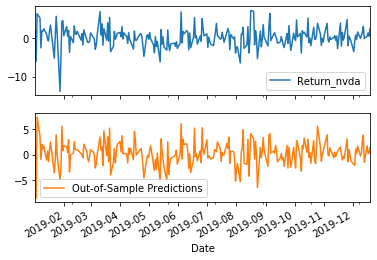

In [120]:
# Train Test Split Predictions
train_1 = df_1.loc['2016':'2019']
test_1 = df_1['2019']

# Create train and test sets for dependent and independent variables
X_train_1 = train_1[['Return_amat', 'Return_adi', 'Return_lrcx', 'Return_mu', 'Return_slab', 'Return_xlnx', 'Return_klac', 'Return_amd', 'Return_usd']]
y_train_1 = train_1["Return_nvda"]
X_test_1 = test_1[['Return_amat', 'Return_adi', 'Return_lrcx', 'Return_mu', 'Return_slab', 'Return_xlnx', 'Return_klac', 'Return_amd', 'Return_usd']]
y_test_1 = test_1["Return_nvda"]


model_nvda = LinearRegression()
model_nvda.fit(X_train_1, y_train_1)
predictions = model_nvda.predict(X_test_1)

out_of_sample_results = y_test_1.to_frame()
out_of_sample_results["Out-of-Sample Predictions"] = model_nvda.predict(X_test_1)


#Out-of-Sample
# Plot the out-of-sample results for 2019
out_of_sample_results.plot(subplots=True)

# Calculate out-of-sample mean_squared_error 
out_of_sample_mse = mean_squared_error(out_of_sample_results["Return_nvda"], out_of_sample_results["Out-of-Sample Predictions"])


#In sample
# using just the "y" training data:
in_sample_results = y_train_1.to_frame()  
in_sample_results["In-sample Predictions"] = model_nvda.predict(X_train_1)
in_sample_mse = mean_squared_error(in_sample_results["Return_nvda"],in_sample_results["In-sample Predictions"])

# Calculate in-sample / out-of-sample root mean_squared_error
in_sample_rmse = np.sqrt(in_sample_mse)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

# RandomForest Algo-Trading

In [121]:
df_2 = stocks_df.copy()
df_2 = df_2[['NVDA_Close', 'AMAT_Close', 'ADI_Close', 'LRCX_Close', 'MU_Close', 'SLAB_Close', 'ASML_Close', 'XLNX_Close', 'KLAC_Close', 'AMD_Close', 'MCHI_Close']]
df_2.head()

NVDA_Close  AMAT_Close  ADI_Close  LRCX_Close   MU_Close  \
Date                                                                   
2016-12-01   87.639999   30.100000  69.010002   98.580002  18.480000   
2016-12-02   88.449997   31.440001  70.110001  100.489998  18.790001   
2016-12-05   91.879997   31.530001  70.599998  102.400002  18.610001   
2016-12-06   93.389999   31.610001  71.000000  103.050003  19.059999   
2016-12-07   95.070000   32.509998  72.940002  106.550003  20.440001   

            SLAB_Close  ASML_Close  XLNX_Close  KLAC_Close  AMD_Close  \
Date                                                                    
2016-12-01   62.250000   99.989998   53.389999   75.930000       8.39   
2016-12-02   63.599998   99.779999   54.220001   76.260002       8.53   
2016-12-05   64.900002  102.919998   54.369999   77.029999       8.68   
2016-12-06   66.250000  102.709999   54.540001   78.120003       9.45   
2016-12-07   67.050003  103.550003   55.299999   79.260002       9.56   

            MCHI_Close  
Date                    
2016-12-01   19.705000  
2016-12-02   20.161667  
2016-12-05   20.643333  
2016-12-06   20.913334  
2016-12-07   21.865000

In [122]:
df_3 = df_2.copy()
df_3 = df_3.reset_index()
df_3.set_index(pd.to_datetime(df_3['Date'], infer_datetime_format=True), inplace=True)
df_3.drop(columns=['Date'], inplace=True)

#Setting up the features
x_feature_list = ['NVDA_Close', 'AMAT_Close', 'ADI_Close', 'LRCX_Close', 'MU_Close', 'SLAB_Close', 'ASML_Close','XLNX_Close', 'KLAC_Close', 'AMD_Close','MCHI_Close']
df_3[x_feature_list].tail()

NVDA_Close  AMAT_Close   ADI_Close  LRCX_Close   MU_Close  \
Date                                                                    
2019-12-13  223.990005   59.869999  118.769997  281.950012  51.200001   
2019-12-16  225.149994   59.959999  118.860001  284.250000  52.939999   
2019-12-17  228.289993   60.790001  118.820000  290.570007  53.000000   
2019-12-18  229.509995   60.380001  117.000000  288.019989  53.040001   
2019-12-19  235.460007   60.669998  118.699997  293.290009  54.529999   

            SLAB_Close  ASML_Close  XLNX_Close  KLAC_Close  AMD_Close  \
Date                                                                    
2019-12-13  112.930000  289.890015   96.230003  171.240005  41.150002   
2019-12-16  114.160004  292.970001   96.379997  172.059998  42.349998   
2019-12-17  114.269997  294.839996   96.000000  175.960007  42.770000   
2019-12-18  112.790001  292.160004   96.930000  175.259995  42.299999   
2019-12-19  115.330002  291.820007   96.290001  175.460007  42.830002   

            MCHI_Close  
Date                    
2019-12-13   58.330002  
2019-12-16   59.299999  
2019-12-17   59.610001  
2019-12-18   59.509998  
2019-12-19   60.680000

In [53]:
#Shift one in index
df_3[x_feature_list] = df_3[x_feature_list].shift(1)
df_3.dropna(subset=x_feature_list, inplace=True)
df_3[x_feature_list].head()

NVDA_Close  AMAT_Close  ADI_Close  LRCX_Close   MU_Close  \
Date                                                                   
2016-12-02   87.639999   30.100000  69.010002   98.580002  18.480000   
2016-12-05   88.449997   31.440001  70.110001  100.489998  18.790001   
2016-12-06   91.879997   31.530001  70.599998  102.400002  18.610001   
2016-12-07   93.389999   31.610001  71.000000  103.050003  19.059999   
2016-12-08   95.070000   32.509998  72.940002  106.550003  20.440001   

            SLAB_Close  ASML_Close  XLNX_Close  KLAC_Close  AMD_Close  \
Date                                                                    
2016-12-02   62.250000   99.989998   53.389999   75.930000       8.39   
2016-12-05   63.599998   99.779999   54.220001   76.260002       8.53   
2016-12-06   64.900002  102.919998   54.369999   77.029999       8.68   
2016-12-07   66.250000  102.709999   54.540001   78.120003       9.45   
2016-12-08   67.050003  103.550003   55.299999   79.260002       9.56   

            MCHI_Close  
Date                    
2016-12-02   19.705000  
2016-12-05   20.161667  
2016-12-06   20.643333  
2016-12-07   20.913334  
2016-12-08   21.865000

In [125]:
# Construct dependent variable 
# Should I get the daily return or just proceed with stock price? 
df_3['daily_return_nvda'] = df_3['NVDA_Close'].pct_change()
df_3.dropna(inplace=True)
df_3.head()

NVDA_Close  AMAT_Close  ADI_Close  LRCX_Close   MU_Close  \
Date                                                                   
2016-12-02   88.449997   31.440001  70.110001  100.489998  18.790001   
2016-12-05   91.879997   31.530001  70.599998  102.400002  18.610001   
2016-12-06   93.389999   31.610001  71.000000  103.050003  19.059999   
2016-12-07   95.070000   32.509998  72.940002  106.550003  20.440001   
2016-12-08   93.480003   32.709999  73.879997  107.150002  20.660000   

            SLAB_Close  ASML_Close  XLNX_Close  KLAC_Close  AMD_Close  \
Date                                                                    
2016-12-02   63.599998   99.779999   54.220001   76.260002       8.53   
2016-12-05   64.900002  102.919998   54.369999   77.029999       8.68   
2016-12-06   66.250000  102.709999   54.540001   78.120003       9.45   
2016-12-07   67.050003  103.550003   55.299999   79.260002       9.56   
2016-12-08   68.099998  103.110001   55.639999   78.849998      10.34   

            MCHI_Close  daily_return_nvda  
Date                                       
2016-12-02   20.161667           0.009242  
2016-12-05   20.643333           0.038779  
2016-12-06   20.913334           0.016435  
2016-12-07   21.865000           0.017989  
2016-12-08   22.248333          -0.016724

In [126]:
# Making dependant variable to binary data
df_3['pos_daily_return_nvda'] = np.where(df_3['daily_return_nvda'] > 0, 1.0, 0.0)

In [127]:
# Assign training and testing window
training_start = df_3.index.min().strftime(format = '%Y-%m-%d')
training_end = '2017-05-10'

testing_start = '2017-05-11'
testing_end = df_3.index.max().strftime(format = '%Y-%m-%d')

print(f"Training Start: {training_start}")
print(f"Training End: {training_end}") 
print(f"Testing Start: {testing_start}") 
print(f"Testing End: {testing_end}") 

#Split train/test
x_train = df_3[x_feature_list][training_start:training_end]
y_train = df_3['pos_daily_return_nvda'][training_start:training_end]
x_test = df_3[x_feature_list][testing_start:testing_end]
y_test = df_3['pos_daily_return_nvda'][testing_start:testing_end]
y_test.tail()

#Using Classifier
model_algo = RandomForestClassifier(n_estimators = 100, max_depth = 3 , random_state = 0)
model_algo.fit(x_train, y_train) 

#Prediction
prediction_algo = model_algo.predict(x_test)

#Result
results_algo = y_test.to_frame()
results_algo['Predicted Value'] = prediction_algo
results_algo

Training Start: 2016-12-02
Training End: 2017-05-10
Testing Start: 2017-05-11
Testing End: 2019-12-19


pos_daily_return_nvda  Predicted Value
Date                                              
2017-05-11                    1.0              1.0
2017-05-12                    1.0              1.0
2017-05-15                    1.0              1.0
2017-05-16                    1.0              1.0
2017-05-17                    0.0              1.0
...                           ...              ...
2019-12-13                    0.0              1.0
2019-12-16                    1.0              1.0
2019-12-17                    1.0              1.0
2019-12-18                    1.0              1.0
2019-12-19                    1.0              1.0

[658 rows x 2 columns]

In [128]:
results_algo['Return'] = df_3.NVDA_Close.pct_change()
results_algo.dropna(inplace=True)
results_algo.head()

pos_daily_return_nvda  Predicted Value    Return
Date                                                        
2017-05-11                    1.0              1.0  0.042955
2017-05-12                    1.0              1.0  0.010988
2017-05-15                    1.0              1.0  0.050199
2017-05-16                    1.0              1.0  0.018614
2017-05-17                    0.0              1.0 -0.066442

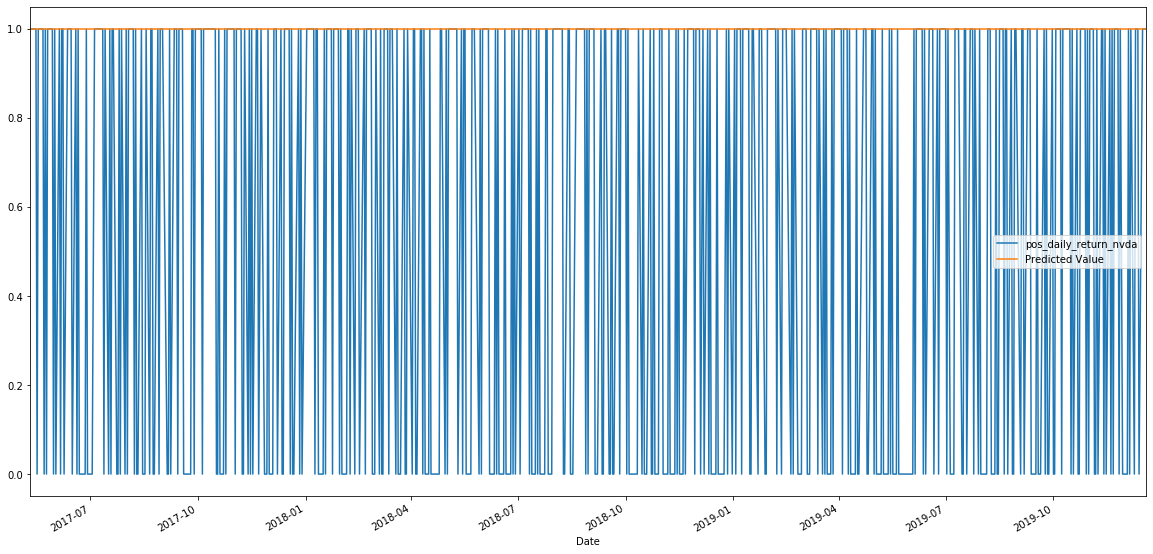

In [129]:
results_algo[['pos_daily_return_nvda', 'Predicted Value']].plot(figsize=(20,10))

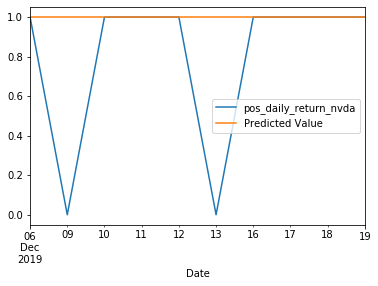

In [130]:
results_algo[['pos_daily_return_nvda', 'Predicted Value']].tail(10).plot()

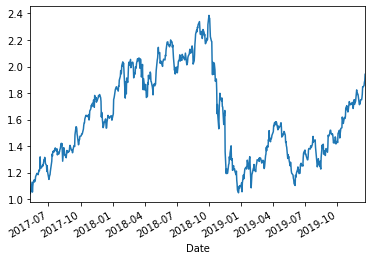

In [131]:
(1 + (results_algo.Return * results_algo['Predicted Value'])).cumprod().plot()

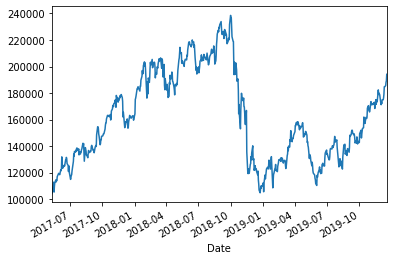

In [132]:
initial_capital = 100000

cum_return = initial_capital * (1+(results_algo['Return'] * results_algo['Predicted Value'])).cumprod()
cum_return.plot()

In [133]:
# Model Evaluation
cm = confusion_matrix(y_test, prediction_algo)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns = ['Predicted 0', 'Predicted 1'])
accuracy = accuracy_score(y_test, prediction_algo)

print("COnfusion Matrix")
display(cm_df)
print(f"Accuracy : {accuracy}")
print("Classification Report")
print(classification_report(y_test, prediction_algo))

COnfusion Matrix


Predicted 0  Predicted 1
Actual 0            0          304
Actual 1            0          354

Accuracy : 0.5379939209726444
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       304
         1.0       0.54      1.00      0.70       354

    accuracy                           0.54       658
   macro avg       0.27      0.50      0.35       658
weighted avg       0.29      0.54      0.38       658



In [134]:
# Feature importance
X_5 = df_2.copy()

importances = model_algo.feature_importances_
importances_sorted = sorted(zip(model_algo.feature_importances_, X_5.columns), reverse=True)
importances_sorted[:10]

[(0.11834119155397309, 'MU_Close'),
 (0.11354007957054428, 'ADI_Close'),
 (0.11110930346209212, 'XLNX_Close'),
 (0.09925235483733909, 'AMD_Close'),
 (0.09488745362344167, 'ASML_Close'),
 (0.09319697708565805, 'LRCX_Close'),
 (0.08613551246567065, 'SLAB_Close'),
 (0.07405009176674202, 'KLAC_Close'),
 (0.07266856476418113, 'MCHI_Close'),
 (0.06947636478739418, 'NVDA_Close')]

# Deep Learning To Predict NVDA Price

In [135]:
# Create the features X and target Y
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

df_2.head()

NVDA_Close  AMAT_Close  ADI_Close  LRCX_Close   MU_Close  \
Date                                                                   
2016-12-01   87.639999   30.100000  69.010002   98.580002  18.480000   
2016-12-02   88.449997   31.440001  70.110001  100.489998  18.790001   
2016-12-05   91.879997   31.530001  70.599998  102.400002  18.610001   
2016-12-06   93.389999   31.610001  71.000000  103.050003  19.059999   
2016-12-07   95.070000   32.509998  72.940002  106.550003  20.440001   

            SLAB_Close  ASML_Close  XLNX_Close  KLAC_Close  AMD_Close  \
Date                                                                    
2016-12-01   62.250000   99.989998   53.389999   75.930000       8.39   
2016-12-02   63.599998   99.779999   54.220001   76.260002       8.53   
2016-12-05   64.900002  102.919998   54.369999   77.029999       8.68   
2016-12-06   66.250000  102.709999   54.540001   78.120003       9.45   
2016-12-07   67.050003  103.550003   55.299999   79.260002       9.56   

            MCHI_Close  
Date                    
2016-12-01   19.705000  
2016-12-02   20.161667  
2016-12-05   20.643333  
2016-12-06   20.913334  
2016-12-07   21.865000

In [136]:
X_11 = df_2.iloc[:, 0:10].values
y_11 = df_2['NVDA_Close'].values

In [137]:
scaler_11 = StandardScaler().fit(X_11)
X_111 = scaler_11.transform(X_11)

In [138]:
number_hidden_nodes = 7
number_input_features = 10

nn_11 = Sequential()

#First Layer
nn_11.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation='relu'))

#Output layer
nn_11.add(Dense(units=1, activation="linear"))

#Compile
nn_11.compile(loss="mean_squared_error", optimizer='adam', metrics=['mse'])

model_testing = nn_11.fit(X_111, y_11, validation_split=0.3, epochs=200, verbose=0)

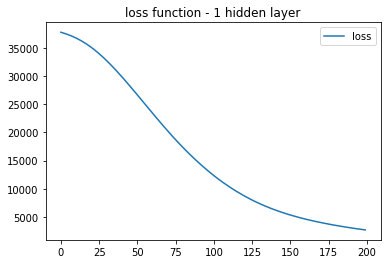

In [139]:
#Plot
plt.plot(model_testing.history['loss'])
plt.title("loss function - 1 hidden layer")
plt.legend(['loss'])
plt.show()

In [140]:
# With second layer
number_input_features = 10
hidden_nodes_layer1 = 7
hidden_nodes_layer2 = 5

nn_22 = Sequential()

#First Layer
nn_22.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))
#Second Layer
nn_22.add(Dense(units=hidden_nodes_layer2, activation='relu'))

#Output Layer
nn_22.add(Dense(units=1, activation="linear"))

#Compile
nn_22.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

model_testing_2 = nn_22.fit(X_11, y_11, validation_split=0.3, epochs=100, verbose=0)

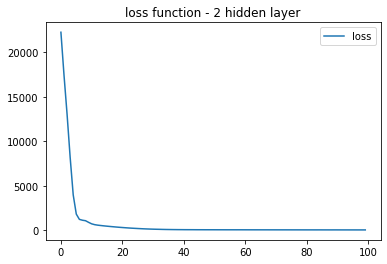

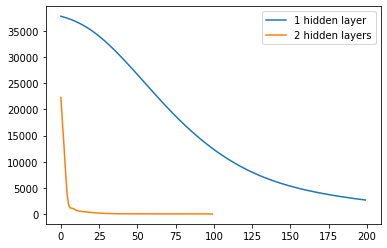

In [141]:
plt.plot(model_testing_2.history['loss'])
plt.title("loss function - 2 hidden layer")
plt.legend(['loss'])
plt.show()


# Val Loss
plt.plot(model_testing.history['loss'])
plt.plot(model_testing_2.history['loss'])
plt.legend(['1 hidden layer', '2 hidden layers'])
plt.show()

In [71]:
#Save model as JSON
nn_22_json = nn_22.to_json()
file_path = Path('/Users/jiwookkim/Desktop/Columbia/Project_2/model.json')
with open(file_path, 'w') as json_file:
    json_file.write(nn_22_json)     

file_path = Path('/Users/jiwookkim/Desktop/Columbia/Project_2/model.hdf5')
nn_22.save_weights(file_path)

AttributeError: 'PosixPath' object has no attribute 'endswith'

In [72]:
#Load the model to predict values
file_path = Path('/Users/jiwookkim/Desktop/Columbia/Project_2/model.json')
with open(file_path, 'r') as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

file_path = Path('/Users/jiwookkim/Desktop/Columbia/Project_2/model.json/model.h5')
loaded_model.load_weights(file_path)

AttributeError: 'PosixPath' object has no attribute 'endswith'

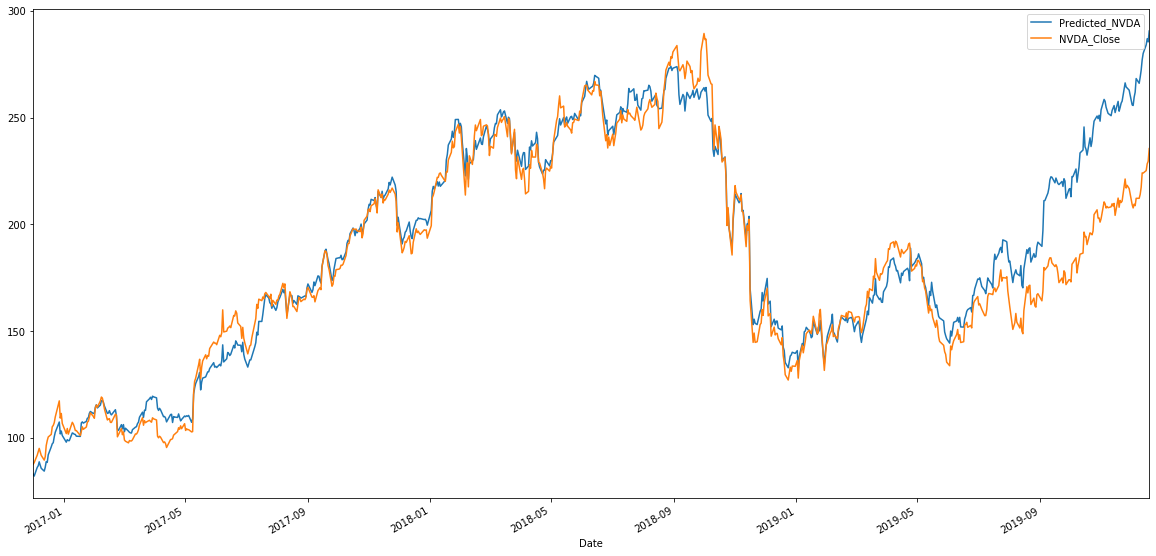

In [142]:
# Predict values using the testing data
df_2['Predicted_NVDA'] = nn_22.predict(X_11)
stocks_final = df_2[['Predicted_NVDA', 'NVDA_Close']]
stocks_final.plot(figsize=(20,10))
#plt.plot(df_2['NVDA_Close'])
#plt.plot(df_2['Predicted_NVDA'])
#plt.legend(['NVDA_Close', 'Predicted_NVDA'])
plt.show()

#  Trial 2

In [143]:
# Trial 2
X_222 = X_11.copy()
y_222 = y_11.copy()

# Split
split_222 = int(0.7 * len(X_222))
X_train_222 = X_222[: split_222 - 1]
X_test_222 = X_222[split_222:]
y_train_222 = y_222[: split_222 - 1]
y_test_222 = y_222[split_222:]

len(y_test_222)

231

In [144]:
#Scale
scaler_2222 = MinMaxScaler()
scaler_2222.fit(X_222)
X_train_222 = scaler_2222.transform(X_train_222)
X_test_222 = scaler_2222.transform(X_test_222)

#reshape
y_222 = np.array(y_222).reshape(-1, 1)
y_train_222 = np.array(y_train_222).reshape(-1,1)
y_test_222 = np.array(y_test_222).reshape(-1,1)

len(y_test_222)

231

In [145]:
#Scale
scaler_2222.fit(y_222)
y_train_222 = scaler_2222.transform(y_train_222)
y_test_222 = scaler_2222.transform(y_test_222)

len(y_test_222)

231

In [146]:
#Transform
X_train_222 = np.reshape(X_train_222, (X_train_222.shape[0], 1, X_train_222.shape[1]))
X_test_222 = np.reshape(X_test_222, (X_test_222.shape[0], 1, X_test_222.shape[1]))

#X_train_222 = X_train_222.reshape((X_train_222.shape[0], X_train_222.shape[1], 1))
#X_test_222 = X_test_222.reshape((X_test_222.shape[0], X_test_222.shape[1], 1))



#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [147]:
X_train_222.shape[1]

1

In [148]:
#Define model
#Should I add more layers? or should I reduce the dropout_fraction?
model_2222 = Sequential()

number_units = 10
dropout_fraction = 0.3

#First layer
model_2222.add(LSTM(units=number_units, return_sequences=True, input_shape=(X_train_222.shape[1], 10)))
model_2222.add(Dropout(dropout_fraction))

#Second Layer
model_2222.add(LSTM(units=number_units, return_sequences=True))
model_2222.add(Dropout(dropout_fraction))

#Third Layer
model_2222.add(LSTM(units=number_units))
model_2222.add(Dropout(dropout_fraction))

#Output
model_2222.add(Dense(1))

In [149]:
#Compile
model_2222.compile(optimizer='adam', loss='mean_squared_error')

model_2222.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 10)             840       
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 10)             840       
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [151]:
model_2222.fit(X_train_222, y_train_222, epochs=10, shuffle=False, verbose=1, batch_size=1)

Train on 536 samples
Epoch 1/10
536/536 [==============================] - 2s 3ms/sample - loss: 0.0105
Epoch 2/10
536/536 [==============================] - 2s 3ms/sample - loss: 0.0114
Epoch 3/10
536/536 [==============================] - 2s 3ms/sample - loss: 0.0110
Epoch 4/10
536/536 [==============================] - 2s 3ms/sample - loss: 0.0112
Epoch 5/10
536/536 [==============================] - 2s 3ms/sample - loss: 0.0097
Epoch 6/10
536/536 [==============================] - 2s 3ms/sample - loss: 0.0105
Epoch 7/10
536/536 [==============================] - 2s 3ms/sample - loss: 0.0090
Epoch 8/10
536/536 [==============================] - 2s 4ms/sample - loss: 0.0084
Epoch 9/10
536/536 [==============================] - 2s 4ms/sample - loss: 0.0095
Epoch 10/10
536/536 [==============================] - 2s 3ms/sample - loss: 0.0080


In [152]:
# evaluate
results = model_2222.evaluate(X_test_222, y_test_222)
results

231/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.05851007638362063

In [154]:
#Prediction
predicted_2222 = model_2222.predict(X_test_222)
predicted_prices_222 = scaler_2222.inverse_transform(predicted_2222)
real_prices_2222 = scaler_2222.inverse_transform(y_test_222)

stocks_2222 = pd.DataFrame({'Real Price': real_prices_2222.ravel(), 'Predicted Price':predicted_prices_222.ravel()})

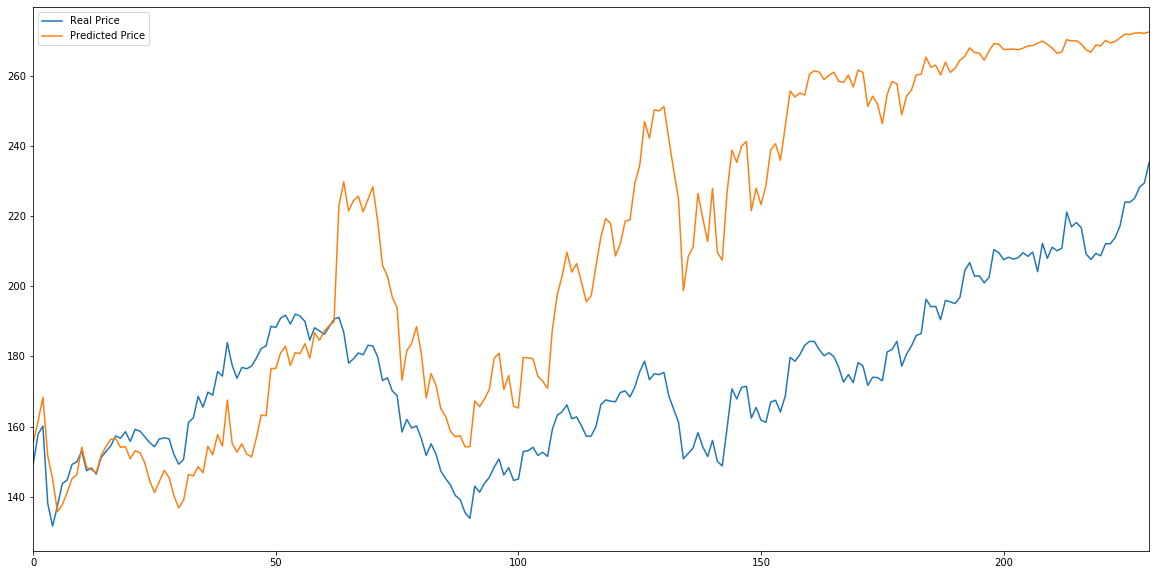

In [155]:
#Plot the result
stocks_2222.plot(figsize=(20,10))

In [156]:
stocks_2222 # I have only 231 testing data set, but deep learning seems giving me better result..why?

Real Price  Predicted Price
0    149.289993       155.356506
1    157.839996       161.545334
2    160.149994       168.353470
3    138.009995       151.637222
4    131.600006       144.986847
..          ...              ...
226  223.990005       271.908203
227  225.149994       272.241455
228  228.289993       272.387299
229  229.509995       272.179932
230  235.460007       272.622528

[231 rows x 2 columns]

# Signal / Backtesting

In [158]:
df_4 = df_2.copy()
df_4 = df_4.reset_index()
df_4

Date  NVDA_Close  AMAT_Close   ADI_Close  LRCX_Close   MU_Close  \
0   2016-12-01   87.639999   30.100000   69.010002   98.580002  18.480000   
1   2016-12-02   88.449997   31.440001   70.110001  100.489998  18.790001   
2   2016-12-05   91.879997   31.530001   70.599998  102.400002  18.610001   
3   2016-12-06   93.389999   31.610001   71.000000  103.050003  19.059999   
4   2016-12-07   95.070000   32.509998   72.940002  106.550003  20.440001   
..         ...         ...         ...         ...         ...        ...   
763 2019-12-13  223.990005   59.869999  118.769997  281.950012  51.200001   
764 2019-12-16  225.149994   59.959999  118.860001  284.250000  52.939999   
765 2019-12-17  228.289993   60.790001  118.820000  290.570007  53.000000   
766 2019-12-18  229.509995   60.380001  117.000000  288.019989  53.040001   
767 2019-12-19  235.460007   60.669998  118.699997  293.290009  54.529999   

     SLAB_Close  ASML_Close  XLNX_Close  KLAC_Close  AMD_Close  MCHI_Close  \
0     62.250000   99.989998   53.389999   75.930000   8.390000   19.705000   
1     63.599998   99.779999   54.220001   76.260002   8.530000   20.161667   
2     64.900002  102.919998   54.369999   77.029999   8.680000   20.643333   
3     66.250000  102.709999   54.540001   78.120003   9.450000   20.913334   
4     67.050003  103.550003   55.299999   79.260002   9.560000   21.865000   
..          ...         ...         ...         ...        ...         ...   
763  112.930000  289.890015   96.230003  171.240005  41.150002   58.330002   
764  114.160004  292.970001   96.379997  172.059998  42.349998   59.299999   
765  114.269997  294.839996   96.000000  175.960007  42.770000   59.610001   
766  112.790001  292.160004   96.930000  175.259995  42.299999   59.509998   
767  115.330002  291.820007   96.290001  175.460007  42.830002   60.680000   

     Predicted_NVDA  Predicted_NVDA_2  
0         83.046051               NaN  
1         82.110847               NaN  
2         86.168221               NaN  
3         86.913292               NaN  
4         88.783546               NaN  
..              ...               ...  
763      280.049286               NaN  
764      284.017120               NaN  
765      286.873871               NaN  
766      285.428223               NaN  
767      290.524445               NaN  

[768 rows x 14 columns]

In [159]:
# Creating signal DataFrame
signals_df = df_4.loc[:, ['Date','NVDA_Close', 'Predicted_NVDA']]
signals_df.head()

Date  NVDA_Close  Predicted_NVDA
0 2016-12-01   87.639999       83.046051
1 2016-12-02   88.449997       82.110847
2 2016-12-05   91.879997       86.168221
3 2016-12-06   93.389999       86.913292
4 2016-12-07   95.070000       88.783546

In [160]:
# Set 'Date' as the index
signals_df = signals_df.set_index('Date', drop=True)

In [168]:
# Creating signal column for the indication
signals_df['Signal'] = 0.0

signals_df['Signal'] = np.where(signals_df['Predicted_NVDA'] > signals_df['NVDA_Close'], 1.0, 0.0)
signals_df['Entry/Exit'] = signals_df['Signal'].diff()
signals_df.head(10)

NVDA_Close  Predicted_NVDA  Signal  Entry/Exit  Position  \
Date                                                                   
2016-12-01   87.639999       83.046051     0.0         NaN       0.0   
2016-12-02   88.449997       82.110847     0.0         0.0       0.0   
2016-12-05   91.879997       86.168221     0.0         0.0       0.0   
2016-12-06   93.389999       86.913292     0.0         0.0       0.0   
2016-12-07   95.070000       88.783546     0.0         0.0       0.0   
2016-12-08   93.480003       87.157936     0.0         0.0       0.0   
2016-12-09   91.820000       85.752052     0.0         0.0       0.0   
2016-12-12   89.589996       84.424782     0.0         0.0       0.0   
2016-12-13   91.169998       86.240387     0.0         0.0       0.0   
2016-12-14   96.449997       88.898270     0.0         0.0       0.0   

            Entry/Exit Position  Portfolio Holdings  Portfolio Cash  \
Date                                                                  
2016-12-01                  NaN                 NaN             NaN   
2016-12-02                  0.0                 0.0        100000.0   
2016-12-05                  0.0                 0.0        100000.0   
2016-12-06                  0.0                 0.0        100000.0   
2016-12-07                  0.0                 0.0        100000.0   
2016-12-08                  0.0                 0.0        100000.0   
2016-12-09                  0.0                 0.0        100000.0   
2016-12-12                  0.0                 0.0        100000.0   
2016-12-13                  0.0                 0.0        100000.0   
2016-12-14                  0.0                 0.0        100000.0   

            Portfolio Total  Portfolio Daily Returns  \
Date                                                   
2016-12-01              NaN                      NaN   
2016-12-02         100000.0                      NaN   
2016-12-05         100000.0                      0.0   
2016-12-06         100000.0                      0.0   
2016-12-07         100000.0                      0.0   
2016-12-08         100000.0                      0.0   
2016-12-09         100000.0                      0.0   
2016-12-12         100000.0                      0.0   
2016-12-13         100000.0                      0.0   
2016-12-14         100000.0                      0.0   

            Portfolio Cumulative Returns  
Date                                      
2016-12-01                           NaN  
2016-12-02                           NaN  
2016-12-05                           0.0  
2016-12-06                           0.0  
2016-12-07                           0.0  
2016-12-08                           0.0  
2016-12-09                           0.0  
2016-12-12                           0.0  
2016-12-13                           0.0  
2016-12-14                           0.0

In [169]:
# exit position relative to close price
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['NVDA_Close'].hvplot.scatter(color='red', legend=False, ylabel='Price in $', width=1000, height=400)

# entry position relative to close price
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['NVDA_Close'].hvplot.scatter(color='green', legend=False, ylabel='Price in $', width=1000, height=400)

# close price for the investment
security_close = signals_df[['NVDA_Close']].hvplot(line_color='lightgray', ylabel='Price in $', width=1000, height=400)

# Visualize moving averages
moving_avgs = signals_df[['NVDA_Close', 'Predicted_NVDA']].hvplot(ylabel='Price in $', width=1000, height=400)

# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I               :Curve   [Date]   (NVDA_Close)
   .NdOverlay.I           :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.NVDA_Close.I  :Scatter   [Date]   (NVDA_Close)
   .Scatter.NVDA_Close.II :Scatter   [Date]   (NVDA_Close)

In [170]:
# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1
signals_df['Position'] = share_size * signals_df['Signal']

# Find the points in time where a 500 share position is bought or sold
signals_df['Entry/Exit Position'] = signals_df['Position'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
signals_df['Portfolio Holdings'] = signals_df['NVDA_Close'] * signals_df['Entry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
signals_df['Portfolio Cash'] = initial_capital - (signals_df['NVDA_Close'] * signals_df['Entry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings
signals_df['Portfolio Total'] = signals_df['Portfolio Cash'] + signals_df['Portfolio Holdings']

# Calculate the portfolio daily returns
signals_df['Portfolio Daily Returns'] = signals_df['Portfolio Total'].pct_change()

# Calculate the cumulative returns
signals_df['Portfolio Cumulative Returns'] = (1 + signals_df['Portfolio Daily Returns']).cumprod() - 1

# Print the DataFrame
signals_df.tail(10)

NVDA_Close  Predicted_NVDA  Signal  Entry/Exit  Position  \
Date                                                                   
2019-12-06  212.169998      268.249237     1.0         0.0     500.0   
2019-12-09  212.169998      266.029114     1.0         0.0     500.0   
2019-12-10  213.979996      268.866547     1.0         0.0     500.0   
2019-12-11  217.339996      272.205048     1.0         0.0     500.0   
2019-12-12  224.070007      277.045563     1.0         0.0     500.0   
2019-12-13  223.990005      280.049286     1.0         0.0     500.0   
2019-12-16  225.149994      284.017120     1.0         0.0     500.0   
2019-12-17  228.289993      286.873871     1.0         0.0     500.0   
2019-12-18  229.509995      285.428223     1.0         0.0     500.0   
2019-12-19  235.460007      290.524445     1.0         0.0     500.0   

            Entry/Exit Position  Portfolio Holdings  Portfolio Cash  \
Date                                                                  
2019-12-06                  0.0       106084.999084    70985.019684   
2019-12-09                  0.0       106084.999084    70985.019684   
2019-12-10                  0.0       106989.997864    70985.019684   
2019-12-11                  0.0       108669.998169    70985.019684   
2019-12-12                  0.0       112035.003662    70985.019684   
2019-12-13                  0.0       111995.002747    70985.019684   
2019-12-16                  0.0       112574.996948    70985.019684   
2019-12-17                  0.0       114144.996643    70985.019684   
2019-12-18                  0.0       114754.997253    70985.019684   
2019-12-19                  0.0       117730.003357    70985.019684   

            Portfolio Total  Portfolio Daily Returns  \
Date                                                   
2019-12-06    177070.018768                 0.009780   
2019-12-09    177070.018768                 0.000000   
2019-12-10    177975.017548                 0.005111   
2019-12-11    179655.017853                 0.009440   
2019-12-12    183020.023346                 0.018730   
2019-12-13    182980.022430                -0.000219   
2019-12-16    183560.016632                 0.003170   
2019-12-17    185130.016327                 0.008553   
2019-12-18    185740.016937                 0.003295   
2019-12-19    188715.023041                 0.016017   

            Portfolio Cumulative Returns  
Date                                      
2019-12-06                       0.77070  
2019-12-09                       0.77070  
2019-12-10                       0.77975  
2019-12-11                       0.79655  
2019-12-12                       0.83020  
2019-12-13                       0.82980  
2019-12-16                       0.83560  
2019-12-17                       0.85130  
2019-12-18                       0.85740  
2019-12-19                       0.88715

In [171]:
#Plot the backtest result
#exit position relative to total portfolio value
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(color='red', legend=False, ylabel='Total Portfolio Value', width=1000, height=400)

# entry position relative to total portfolio value
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(color='green', legend=False, ylabel='Total Portfolio Value', width=1000, height=400)

# total portoflio value for the investment
total_portfolio_value = signals_df[['Portfolio Total']].hvplot(line_color='lightgray', ylabel='Total Portfolio Value', width=1000, height=400)

# Overlay plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I                    :Curve   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [Date]   (Portfolio Total)

In [172]:
# Evaluation
# Prepare DataFrame for metrics
metrics = ['Annual Return', 'Cumulative Returns', 'Annual Volatility', 'Sharpe Ratio', 'Sortino Ratio']

columns = ['Backtest']

# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest` (just like PyFolio)
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
portfolio_evaluation_df

Backtest
Annual Return           NaN
Cumulative Returns      NaN
Annual Volatility       NaN
Sharpe Ratio            NaN
Sortino Ratio           NaN

In [173]:
# Cumulative return
portfolio_evaluation_df.loc['Cumulative Returns'] = signals_df['Portfolio Cumulative Returns'][-1]

# Annualized return
portfolio_evaluation_df.loc['Annual Return'] = (signals_df['Portfolio Daily Returns'].mean() * 252)

# Annual volatility
portfolio_evaluation_df.loc['Annual Volatility'] = (signals_df['Portfolio Daily Returns'].std() * np.sqrt(252))

# Sharpe Ratio
portfolio_evaluation_df.loc['Sharpe Ratio'] = (signals_df['Portfolio Daily Returns'].mean() * 252) / (signals_df['Portfolio Daily Returns'].std() * np.sqrt(252))

# Downside Return
sortino_ratio_df = signals_df[['Portfolio Daily Returns']].copy()
sortino_ratio_df.loc[:,'Downside Returns'] = 0

target = 0
mask = sortino_ratio_df['Portfolio Daily Returns'] < target
sortino_ratio_df.loc[mask, 'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2
portfolio_evaluation_df

# Sortino Ratio
down_stdev = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)
expected_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * 252
sortino_ratio = expected_return/down_stdev

portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio
portfolio_evaluation_df.head()

Backtest
Annual Return       0.231505
Cumulative Returns   0.88715
Annual Volatility   0.211762
Sharpe Ratio         1.09324
Sortino Ratio        1.58145

In [174]:
 # Initialize trade evaluation DataFrame with columns
trade_evaluation_df = pd.DataFrame(columns=['Stock', 'Entry Date', 'Exit Date', 'Shares', 'Entry Share Price', 'Exit Share Price', 'Entry Portfolio Holding', 'Exit Portfolio Holding', 'Profit/Loss'])
trade_evaluation_df

Empty DataFrame
Columns: [Stock, Entry Date, Exit Date, Shares, Entry Share Price, Exit Share Price, Entry Portfolio Holding, Exit Portfolio Holding, Profit/Loss]
Index: []

In [175]:
# Initialize iterative variables
entry_date = ''
exit_date = ''
entry_portfolio_holding = 0
exit_portfolio_holding = 0
share_size = 0
entry_share_price = 0
exit_share_price = 0

# Loop through signal DataFrame
# If `Entry/Exit` is 1, set entry trade metrics
# Else if `Entry/Exit` is -1, set exit trade metrics and calculate profit,
# Then append the record to the trade evaluation DataFrame
for index, row in signals_df.iterrows():
    if row['Entry/Exit'] == 1:
        entry_date = index
        entry_portfolio_holding = abs(row['Portfolio Holdings'])
        share_size = row['Entry/Exit Position']
        entry_share_price = row['NVDA_Close']

    elif row['Entry/Exit'] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row['NVDA_Close'] * row['Entry/Exit Position'])
        exit_share_price = row['NVDA_Close']
        profit_loss =  entry_portfolio_holding - exit_portfolio_holding
        trade_evaluation_df = trade_evaluation_df.append(
            {
                'Stock': 'NVDA',
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Shares': share_size,
                'Entry Share Price': entry_share_price,
                'Exit Share Price': exit_share_price,
                'Entry Portfolio Holding': entry_portfolio_holding,
                'Exit Portfolio Holding': exit_portfolio_holding,
                'Profit/Loss': profit_loss
            },
            ignore_index=True)

# Print the DataFrame
trade_evaluation_df

Stock Entry Date  Exit Date  Shares  Entry Share Price  Exit Share Price  \
0   NVDA 2017-01-18 2017-02-03   500.0         102.949997        114.379997   
1   NVDA 2017-02-09 2017-02-22   500.0         116.379997        110.760002   
2   NVDA 2017-02-23 2017-05-10   500.0         100.489998        121.290001   
3   NVDA 2017-08-11 2017-08-14   500.0         155.960007        168.399994   
4   NVDA 2017-08-16 2017-09-20   500.0         165.149994        185.839996   
5   NVDA 2017-09-21 2017-10-17   500.0         180.759995        197.750000   
6   NVDA 2017-10-23 2017-10-27   500.0         196.619995        201.860001   
7   NVDA 2017-10-31 2017-11-08   500.0         206.809998        209.160004   
8   NVDA 2017-11-09 2017-11-10   500.0         205.320007        216.139999   
9   NVDA 2017-11-14 2018-01-08   500.0         214.179993        222.000000   
10  NVDA 2018-01-16 2018-02-09   500.0         220.110001        232.080002   
11  NVDA 2018-02-12 2018-02-13   500.0         228.029999        232.630005   
12  NVDA 2018-02-28 2018-03-22   500.0         242.000000        241.850006   
13  NVDA 2018-03-23 2018-03-26   500.0         232.970001        244.479996   
14  NVDA 2018-03-27 2018-04-20   500.0         225.520004        228.710007   
15  NVDA 2018-04-24 2018-05-04   500.0         221.199997        239.059998   
16  NVDA 2018-05-15 2018-05-30   500.0         245.559998        252.990005   
17  NVDA 2018-06-06 2018-08-14   500.0         265.149994        261.429993   
18  NVDA 2018-08-17 2018-08-22   500.0         244.820007        262.820007   
19  NVDA 2018-10-19 2018-10-25   500.0         229.169998        207.839996   
20  NVDA 2018-10-29 2018-10-30   500.0         185.619995        203.000000   
21  NVDA 2018-11-06 2019-01-14   500.0         211.059998        150.440002   
22  NVDA 2019-01-23 2019-01-24   500.0         149.289993        157.839996   
23  NVDA 2019-01-28 2019-02-11   500.0         138.009995        146.449997   
24  NVDA 2019-02-14 2019-02-15   500.0         154.529999        157.339996   

    Entry Portfolio Holding  Exit Portfolio Holding   Profit/Loss  
0              51474.998474            57189.998627  -5715.000153  
1              58189.998627            55380.001068   2809.997559  
2              50244.998932            60645.000458 -10400.001526  
3              77980.003357            84199.996948  -6219.993591  
4              82574.996948            92919.998169 -10345.001221  
5              90379.997253            98875.000000  -8495.002747  
6              98309.997559           100930.000305  -2620.002747  
7             103404.998779           104580.001831  -1175.003052  
8             102660.003662           108069.999695  -5409.996033  
9             107089.996338           111000.000000  -3910.003662  
10            110055.000305           116040.000916  -5985.000610  
11            114014.999390           116315.002441  -2300.003052  
12            121000.000000           120925.003052     74.996948  
13            116485.000610           122239.997864  -5754.997253  
14            112760.002136           114355.003357  -1595.001221  
15            110599.998474           119529.998779  -8930.000305  
16            122779.998779           126495.002747  -3715.003967  
17            132574.996948           130714.996338   1860.000610  
18            122410.003662           131410.003662  -9000.000000  
19            114584.999084           103919.998169  10665.000916  
20             92809.997559           101500.000000  -8690.002441  
21            105529.998779            75220.001221  30309.997559  
22             74644.996643            78919.998169  -4275.001526  
23             69004.997253            73224.998474  -4220.001221  
24             77264.999390            78669.998169  -1404.998779

In [176]:
#Price chart
price_df = signals_df[['NVDA_Close', 'Predicted_NVDA']]
price_chart = price_df.hvplot.line()
price_chart.opts(xaxis=None)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [177]:
portfolio_evaluation_df.reset_index(inplace=True)
portfolio_evaluation_table = portfolio_evaluation_df.hvplot.table()
portfolio_evaluation_table

:Table   [index,Backtest]

In [178]:
trade_evaluation_table = trade_evaluation_df.hvplot.table()
trade_evaluation_table

:Table   [Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss]

In [179]:
import plotly.express as px
import panel as pn
import hvplot
import hvplot.pandas

# Create rows
price_chart_row = pn.Row(price_chart)
portfolio_evaluation_row = pn.Row(portfolio_evaluation_table)
trade_evaluation_row = pn.Row(trade_evaluation_table)

# Create columns
portfolio_column = pn.Column('# Portfolio Evaluation Metrics', price_chart_row, portfolio_evaluation_row)
trade_column = pn.Column('# Trade Evaluation Metrics', trade_evaluation_row)

# Create tabs
trading_dashboard = pn.Tabs(("Portfolio Metrics", portfolio_column), ("Trade Metrics", trade_column))

trading_dashboard.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(NdOverlay)
        [2] Row
            [0] HoloViews(Table)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(Table)